<a href="https://colab.research.google.com/github/borisburd/Prueba1/blob/master/Copia_de_Copia_de_TP_FISICA_2_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 TRABAJO PRÁCTICO NUMÉRICO 1

# Primera parte 



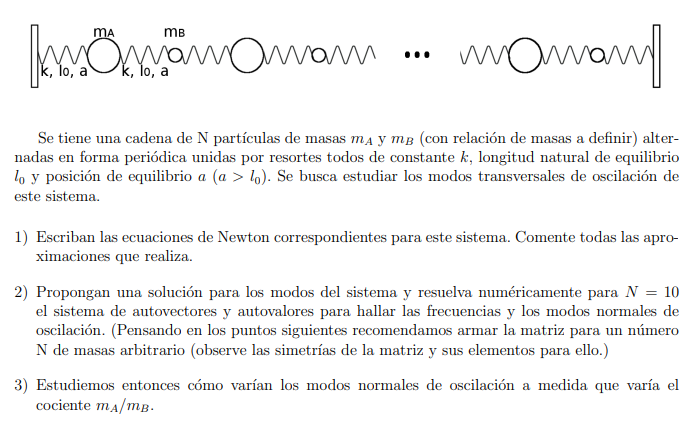

In [1]:
#COSAS A HACER:
  #3)a) mostar como en el caso n masitas se recuperan las ecuaciones de la forma matricial
  #3)a) explicar formalismo n masas
  #3)a) hablar de como son iguales los graficos

# Punto 1 

Se observa en principio que todas las masas $m{_{a}}$, tendran una misma ecuacion de 
movimiento exceptuando la primera. 
Análogamente, todas las masas $m{_{b}}$ tendrán el mismo movimiento exceptuando a la última. \\

A su vez podemos decir que las masas $m{_{a}}$ se ubican en las posiciones pares y las masas $m{_{b}}$ en las pares \\

\\

Para esto diferenciamos cada caso: \\


*    **Para la  masa "1"** (llamamos así a la primera masa $m{_{a}}$): \\

\\

$ \psi_{1}m_{a}= -k(\psi_{1}-\psi_{2}) $ 

  \\
 
*   **Para la  masa "N"** (llamamos así a la última masa $m{_{b}}$):

\\

$ \psi_{N}m_{b}= -k(\psi_{N}-\psi_{N-1}) $ 

\\

*   **Para una masa $m{_{np}}$ genérica** (llamamos  $m{_{np}}$ a las masas pares) :

\\

$ \psi_{np}m_{b}= -k(\psi_{np}-\psi_{np-1})-k(\psi_{np}-\psi_{np+1}) $ 

 \\

*   **Para una masa $m{_{ni}}$ genérica** (llamamos  $m{_{ni}}$ a las masas impares) :

\\

$ \psi_{ni}m_{b}= -k(\psi_{ni}-\psi_{ni-1})-k(\psi_{ni}-\psi_{ni+1}) $ 

 \\


Además buscamos estudiar el movimiento transversal, por lo cual se debe descomponer la fuerza eslástica k para dichos movimientos :



\\



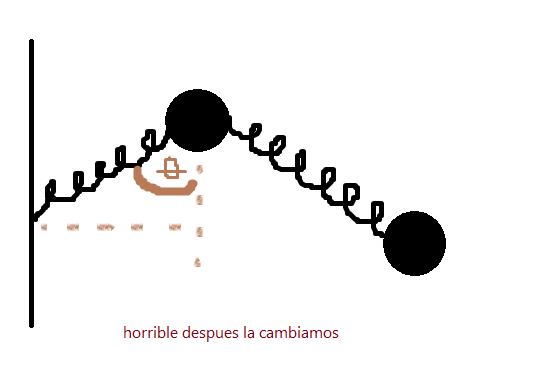

Para una fuerza elástica genérica del sistema tengo que 

$Fe=k(h-l_{0})cos(\theta )=k(h-l_{0})\frac{\Delta \psi }{h}= k (1-\frac{l_{0}}{h}) $

Siendo $h$ la hipotenusa

$h=\sqrt{(\Delta \psi)^{2}+l^{2}}$ 

Donde por aproximación de pequeñas oscilaciones me queda:

$h={l}$ 

\\
Finalmente me queda que la Fuerza elástica es igual a:

\\
$Fe= k (1-\frac{l_{0}}{l}) \Delta \psi $

Donde llamo 

\\
$\tilde{k}=k (1-\frac{l_{0}}{l})$


Redefino mis ecuaciones para movimiento transversal para todas las masas excepto la primera y la última: 
 
$ \ddot{\psi }_{np}= -2\psi_{np}\frac{\tilde{k}}{m_{b}}+\psi_{np-1}\frac{\tilde{k}}{m_{b}}+\psi_{np+1}\frac{\tilde{k}}{m_{b}}$    (1)

$ \ddot{\psi }_{ni}= -2\psi_{ni}\frac{\tilde{k}}{m_{a}}+\psi_{ni-1}\frac{\tilde{k}}{m_{a}}+\psi_{ni+1}\frac{\tilde{k}}{m_{a}}$ (2)

Entonces obtengo las ecuaciones de Movimiento




2) 

los modos normales serían: $\psi_n^{(p)}(x,t)=A^{(p)}v^{(p)}_ncos(w^{(p)}t+\phi^{(p)}) $
donde cada masa tendrá asignada su amplitud por el autovector de cada modo. $A$ y $\phi$ a determinar por las condiciones iniciales. ($v_n^{(p)}$ es la coordenada n del autovector en el modo p).

In [2]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
#Defino constantes
ma = 1 #kg
mb = 1 #kg
l0 = 1 #m
a = 3 #m #a > l0
k_resorte = 2 #N/m
k = k_resorte*(1-l0/a)
N = 10 #Cantidad de masitas
A = 1 #amplitud
phi = 0 #fase 

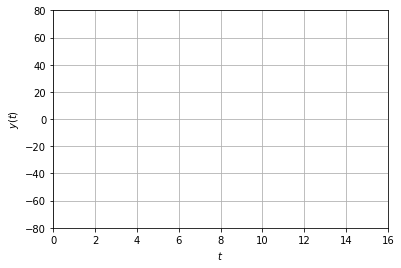

In [4]:
t = np.linspace(0,16,200) #array de tiempos

plt.rcParams['axes.grid'] = True #tener grid para todo ploteo

fig, ax = plt.subplots()
 
ax.set_xlim((0,16));
ax.set_ylim((-80, 80));
ax.set_xlabel("$t$");
ax.set_ylabel("$y(t)$");
ax.grid(True);
plt.show()

In [5]:
def metodo_matricial(N, ma, mb, k_resorte): #resuelve problema de autovalores y autovectores de forma matricial para estos parametros
  k = k_resorte*(1 - l0/a) #este es el k moño pero lo escribo como k para que sea más comodo
  M = np.zeros((N,N)) #matriz para resolver determinante y hallar w^2
  for i in range(1,N-1):
    if i<N:
      if i%2: #esto me devuelve true si i es par
        M[i,i-1] = -k/mb
        M[i,i] = 2*k/mb
        M[i,i+1] = -k/mb
      else:
        M[i,i-1] = -k/ma
        M[i,i] = 2*k/ma
        M[i,i+1] = -k/ma
  M[0,0] = 2*k/ma
  M[0,1] = -k/ma
  if i%2:
    M[N-1,N-1] = 2*k/ma
    M[N-1,N-2] = -k/ma
  else:
    M[N-1,N-1] = 2*k/mb
    M[N-1,N-2] = -k/mb

  w_2, v = np.linalg.eig(M) #busco autovalores w_2 y autovectores v (recordar que los autovalores son w al cuadrado)

  idx = (-w_2).argsort()[::-1]  #ordeno autovalores y autovectores de menor a mayor (codigo de maga)
  w_2 = w_2[idx]
  v = v[:,idx]
  #v=np.around(10*v,1) #los quito de notacion exponencial
  w = np.sqrt(w_2)
  return(w, v) #devuelve frecuencias naturales, y autovectores como columnas

In [6]:
diez_masitas_alternadas = metodo_matricial(10, 1.5, 1, 2)
print(diez_masitas_alternadas) #acá se ven las frecuencias, y los autovectores como columnas (aunque siendo tantos es dificil entenderlos a simple vista)

(array([0.29384035, 0.5808537 , 0.85364834, 1.10201324, 1.29631091,
       1.66253496, 1.79722321, 1.92762262, 2.02658664, 2.08760683]), array([[ 0.12063682, -0.23482089, -0.33855863, -0.43612747,  0.55706547,
         0.14831797,  0.24864337, -0.23468464,  0.17614457,  0.09368843],
       [ 0.22955558, -0.38051202, -0.39956522, -0.27640131,  0.06101276,
        -0.16456254, -0.40622426,  0.51165829, -0.46157541, -0.27196487],
       [ 0.32360911, -0.42991714, -0.24219479,  0.13507804, -0.51193534,
        -0.13630213, -0.07701019, -0.16788642,  0.32249077,  0.25131988],
       [ 0.38622889, -0.31614081,  0.11372812,  0.36200873, -0.11708262,
         0.3157932 ,  0.53204064, -0.14563313, -0.38349071, -0.45758282],
       [ 0.4238378 , -0.12236718,  0.40749445,  0.25921286,  0.42533125,
         0.1132439 , -0.14778147,  0.2824701 ,  0.09179044,  0.32915904],
       [ 0.42027725,  0.11785274,  0.36719483, -0.19772929,  0.16366715,
        -0.44144017, -0.29060078, -0.47020678,  0.14295

Estamos en caso de extremos fijos por lo que los kp son: (mostrar todo el despeje que lleva a eso)

3)

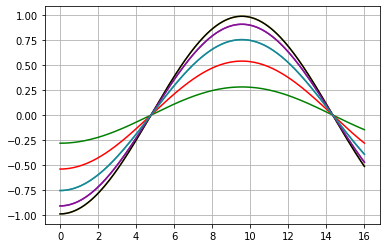

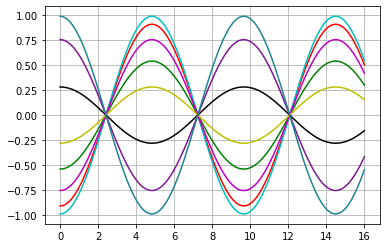

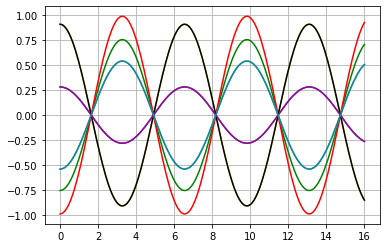

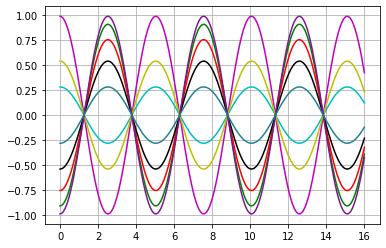

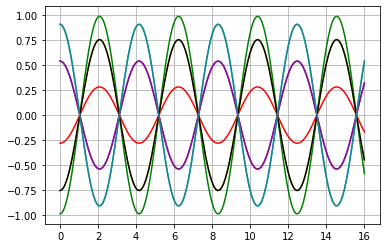

In [7]:
#ma = mb #uso ma pq es indistinto
No = 10
lista_wp = []
lista_kp = []
v_modo = []
for i in range(1,No+1):
  k_p = (i*np.pi)/((No+1)*a)
  w_p = 2*np.sqrt(k/ma)*abs(np.sin(k_p*a/2))
  lista_kp.append(k_p)
  lista_wp.append(w_p)
#for i in range(N): #DESCOMENTAR SI NO FUNCIONA HACER AUTOVECTORES Y VER QUE ONDA ESTO

  #k_p_modo = lista_kp[i]
  #for i in range(1,4):
    #x = np.cos(k_p_modo*i*a+np.pi/2)
    #v_modo.append(x)
#print("Frecuencias naturales:", lista_wp)
#print("Autovectores:", v_modo)

#RECUPERÉ LOS AUTOVALORES Y AUTOVECTORES

#matriz_autovectores = np.zeros((No,No))
#for j in range(No):
  #for i in range(No):
    #matriz_autovectores[(j,i)] = np.cos(lista_kp[i+1]*(j+1)*a+np.pi/2) #PRUEBA 1 
colors = ["b","g","r","c","m","y","k","#7d1791", "#208291","#918220" ] 
for j in range(5):
  plot1 = plt.figure(1)
  for i in range(1,N-1):
      plt.plot(t, A*np.cos(lista_kp[j]*i*a+np.pi/2)*np.cos(lista_wp[j]*t+phi),color = colors[i] ) 
  plt.show()
#for i in range(1,N-1):
  #plt.plot(t, A*np.cos(lista_kp[9]*i*a+np.pi/2)*np.cos(lista_wp[9]*t+phi),color = colors[i] ) 
#plt.show()  







In [8]:
w_diez, v_diez = metodo_matricial(10, 1, 1, 2)
print("Frecuencias método matricial:", w_diez)
print("Frecuencias método N masitas:", lista_wp)

Frecuencias método matricial: [0.32866204 0.65063347 0.95935988 1.24855649 1.51233608 1.74532888
 1.94279181 2.10070511 2.21585411 2.2858947 ]
Frecuencias método N masitas: [0.328662040747037, 0.6506334701275239, 0.9593598783282041, 1.2485564859715546, 1.5123360841001052, 1.7453288807735046, 1.9427918145472245, 2.1007051095257108, 2.2158541064075385, 2.2858947036784802]


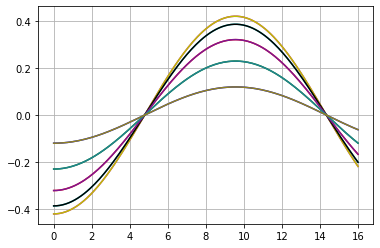

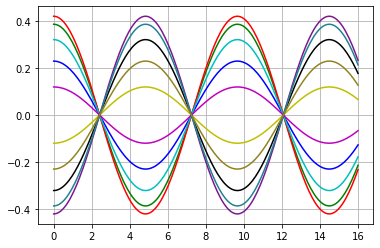

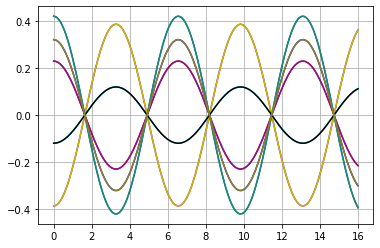

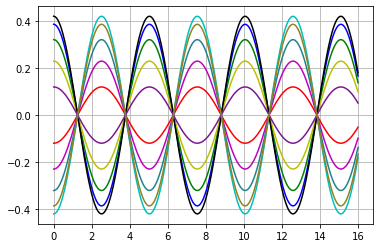

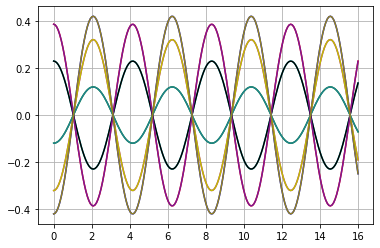

<Figure size 432x288 with 0 Axes>

In [9]:
for j in range(5):
  plot1 = plt.figure(1)
  for i in range(N):
      plt.plot(t, A*v_diez[i,j]*np.cos(w_diez[j]*t+phi),color=colors[i]) 
  plt.show()
plot2 = plt.figure(2)
#for i in range(N):
  #plt.plot(t, A*v_diez[i,9]*np.cos(w_diez[9]*t+phi), color=colors[i])
#plt.show()

3)B

El movimiento más general para excitar el modo 2 y el modo 4 es combinación lineal de ambos modos normales.

$\psi_n(x,t)=Av^{(2)}_ncos(w^{(2)}t+\phi)+Bv^{(4)}_ncos(w^{(4)}t+\Phi) \tag{1}$

Tomando misma amplitud para ambos modos:

$\psi_n(x,t)=Av^{(2)}_ncos(w^{(2)}t+\phi)+Av^{(4)}_ncos(w^{(4)}t+\Phi) \tag{2}$

Para excitar un modo normal de oscilación, basta con colocar las masas respetando la relación de amplitudes dada por los autovectores de dicho modo y dar velocidad inicial nula. O con posición inicial cero y velocidades respetando autovector también. (tomamos velocidad inicial cero).

Derivamos posición:

$\dot{\psi}_n(x,t)=-w^{(2)}Av^{(2)}_nsin(w^{(2)}t+\phi)-w^{(4)}Av^{(4)}_nsin(w^{(4)}t+\Phi) \tag{3}$

Igualamos a cero a $t=0$:

$-w^{(2)}Av^{(2)}_nsin(\phi)-w^{(4)}Av^{(4)}_nsin(\Phi)=0 \tag{4}$

La unica forma de que esto se cumpla es si ambas fases temporales inciales son cero ya que ni las amplitudes ni las frecuencias temporales lo son. (no habría movimiento).

$\phi = \Phi = 0 \tag{5}$

Reescribiendo $(2)$ y reemplazando $t=0$:

$\psi_n(x,0)=Av_n^{(2)}+Av_n^{(4)}$

A fin de cuentas, las posiciones iniciales de cada masa respetan la suma de los autovectores en juego de los modo excitados.

3)c)

La relación de dispersión como ya hemos usado antes es:

$\omega^{(p)^2}=4\frac{\tilde{k}}{m}sin^2(\frac{\kappa^{(p)}a}{2})\tag{6} $

La fase espacial para extremos fijos viene dada por: 

$\kappa=\frac{p\pi}{(N+1)a}\tag{7}$

Por lo tanto reemplazando (7) en (6) me queda que :

$\omega^{(p)^2}=4\frac{\tilde{k}}{m}sin^2(\frac{p\pi}{2(N+1)})$

\\

Al graficarlo obtenemos lo siguiente:

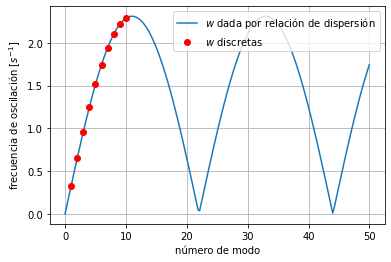

In [53]:
p=np.linspace(0,50,200)
k_p = (p*np.pi)/((No+1)*a)
w_p = 2*np.sqrt(k/ma)*abs(np.sin(k_p*a/2))
plt.plot(p,w_p, label='$w$ dada por relación de dispersión') #grafica rel de dispersión
for i in range(1,11): #grafica los 10 modos
  puntos, = plt.plot(i,w_diez[i-1],'ro')
plt.xlabel("número de modo")
puntos.set_label('$w$ discretas')
plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
plt.legend(loc=1)

La linea celeste representa un gráfico que realizamos de forma continua para las frecuencias naturales en función de los modos. Sin embargo, sabemos que las frecuencias son discretas y que solo tendrán sentido físico aquellas que tengan $p$ contenido en los números enteros. \\
Al graficar estas frecuencias (puntos rojos), notamos que están dispuestas en torno al gráfico continuo, lo cual esperábamos desde un principio. Es importante aclarar que, por más que el gráfico de $w$ en funcion de $p$ sea periódico (por ser de la forma $sin^2(x)$), pasado el $p=N$ (con $N = 10$ en este caso), ya no tienen sentido el resto de frecuencias, al haber superado el modo máximo de oscilación.